In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [185]:
df_flight_train = pd.read_excel("Data_Train.xlsx")
df_flight_test = pd.read_excel("Test_set.xlsx")

In [186]:
df_flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [187]:
df_flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [188]:
df_flight_train.info()
#There is one null value in Route and Total_stops

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [189]:
df_flight_train=df_flight_train.dropna()
#Null value row is dropped

In [190]:
df_flight_train.shape

(10682, 11)

In [191]:
# Cleaning Duration

# Training Set

duration = list(df_flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
df_flight_train['Duration_hours'] = dur_hours
df_flight_train['Duration_minutes'] =dur_minutes

df_flight_train.drop(labels = 'Duration', axis = 1, inplace = True)


# Test Set

durationT = list(df_flight_test['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
df_flight_test['Duration_hours'] = dur_hours
df_flight_test['Duration_minutes'] = dur_minutes

df_flight_test.drop(labels = 'Duration', axis = 1, inplace = True)

In [192]:
df_flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  object
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10682 non-null  object
 9   Price             10682 non-null  int64 
 10  Duration_hours    10682 non-null  int64 
 11  Duration_minutes  10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [193]:
#Cleaning Journey Date 

#Training Set

df_flight_train['Journey_Day'] = pd.to_datetime(df_flight_train.Date_of_Journey, format='%d/%m/%Y').dt.day

df_flight_train['Journey_Month'] = pd.to_datetime(df_flight_train.Date_of_Journey, format='%d/%m/%Y').dt.month

# Test Set

df_flight_test['Journey_Day'] = pd.to_datetime(df_flight_test.Date_of_Journey, format='%d/%m/%Y').dt.day

df_flight_test['Journey_Month'] = pd.to_datetime(df_flight_test.Date_of_Journey, format='%d/%m/%Y').dt.month

# Compare the dates and delete the original date feature

df_flight_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

df_flight_test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [194]:
#Cleaning Departure and Arrival Times

# Training Set


df_flight_train['Depart_Time_Hour'] = pd.to_datetime(df_flight_train.Dep_Time).dt.hour
df_flight_train['Depart_Time_Minutes'] = pd.to_datetime(df_flight_train.Dep_Time).dt.minute

df_flight_train.drop(labels = 'Dep_Time', axis = 1, inplace = True)


df_flight_train['Arr_Time_Hour'] = pd.to_datetime(df_flight_train.Arrival_Time).dt.hour
df_flight_train['Arr_Time_Minutes'] = pd.to_datetime(df_flight_train.Arrival_Time).dt.minute

df_flight_train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)


# Test Set


df_flight_test['Depart_Time_Hour'] = pd.to_datetime(df_flight_test.Dep_Time).dt.hour
df_flight_test['Depart_Time_Minutes'] = pd.to_datetime(df_flight_test.Dep_Time).dt.minute


df_flight_test.drop(labels = 'Dep_Time', axis = 1, inplace = True)

df_flight_test['Arr_Time_Hour'] = pd.to_datetime(df_flight_test.Arrival_Time).dt.hour
df_flight_test['Arr_Time_Minutes'] = pd.to_datetime(df_flight_test.Arrival_Time).dt.minute

df_flight_test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [195]:
df_flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Journey_Day,Journey_Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [196]:
df_flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_minutes,Journey_Day,Journey_Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,10,55,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,4,0,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,23,45,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,13,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2,50,24,6,23,55,2,45


In [197]:
print(df_flight_train.shape)
print(df_flight_test.shape)

(10682, 15)
(2671, 14)


In [198]:
#Converting string into integer
le1 = LabelEncoder()
le2 = LabelEncoder()

# Training Set    

df_flight_train.iloc[:,0] = le1.fit_transform(df_flight_train.iloc[:,0])

df_flight_train.iloc[:,1] = le1.fit_transform(df_flight_train.iloc[:,1])

df_flight_train.iloc[:,2] = le1.fit_transform(df_flight_train.iloc[:,2])

df_flight_train.iloc[:,3] = le1.fit_transform(df_flight_train.iloc[:,3])

df_flight_train.iloc[:,4] = le1.fit_transform(df_flight_train.iloc[:,4])

df_flight_train.iloc[:,5] = le1.fit_transform(df_flight_train.iloc[:,5])

# Test Set


df_flight_test.iloc[:,0] = le2.fit_transform(df_flight_test.iloc[:,0])

df_flight_test.iloc[:,1] = le2.fit_transform(df_flight_test.iloc[:,1])

df_flight_test.iloc[:,2] = le2.fit_transform(df_flight_test.iloc[:,2])

df_flight_test.iloc[:,3] = le2.fit_transform(df_flight_test.iloc[:,3])

df_flight_test.iloc[:,4] = le2.fit_transform(df_flight_test.iloc[:,4])

df_flight_test.iloc[:,5] = le2.fit_transform(df_flight_test.iloc[:,5])

In [199]:
df_flight_train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Journey_Day,Journey_Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,74.820165,1.458248,7.392998,9087.214567,10.244898,28.326624,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.474845,36.729039,1.806320,1.214254,4611.548810,8.494916,16.945817,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,8.000000,5277.000000,2.000000,15.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,8.000000,8372.000000,8.000000,30.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,8.000000,12373.000000,15.000000,45.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,9.000000,79512.000000,47.000000,55.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [200]:
df_flight_train_corr=df_flight_train.corr()
df_flight_train_corr
#Price attribute has decent positive relationship with Duration_hours
#Price attribute has negative relationship with Total_stops

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hours,Duration_minutes,Journey_Day,Journey_Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
Airline,1.000000,-0.013397,0.018446,0.025214,0.035973,-0.060748,-0.039565,-0.158136,-0.028009,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,-0.225605,-0.022109,0.015999,0.166121,-0.145193,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,0.337872,0.026821,-0.071122,-0.258446,0.061235,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,-0.437749,0.035152,0.164149,0.295444,-0.232427,0.081632,0.244186,-0.075002,-0.068071,0.013898,-0.173352
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,1.000000,0.164054,-0.571221,-0.606137,0.182223,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,0.164054,1.000000,-0.065463,-0.168815,0.046910,-0.016296,-0.051491,-0.050983,-0.019392,0.026204,0.041310
Price,-0.039565,0.015999,-0.071122,0.164149,-0.571221,-0.065463,1.000000,0.508778,-0.124855,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Duration_hours,-0.158136,0.166121,-0.258446,0.295444,-0.606137,-0.168815,0.508778,1.000000,-0.126468,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450
Duration_minutes,-0.028009,-0.145193,0.061235,-0.232427,0.182223,0.046910,-0.124855,-0.126468,1.000000,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628
Journey_Day,0.026137,0.004902,-0.041025,0.081632,0.029225,-0.016296,-0.153774,-0.022059,-0.008940,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510


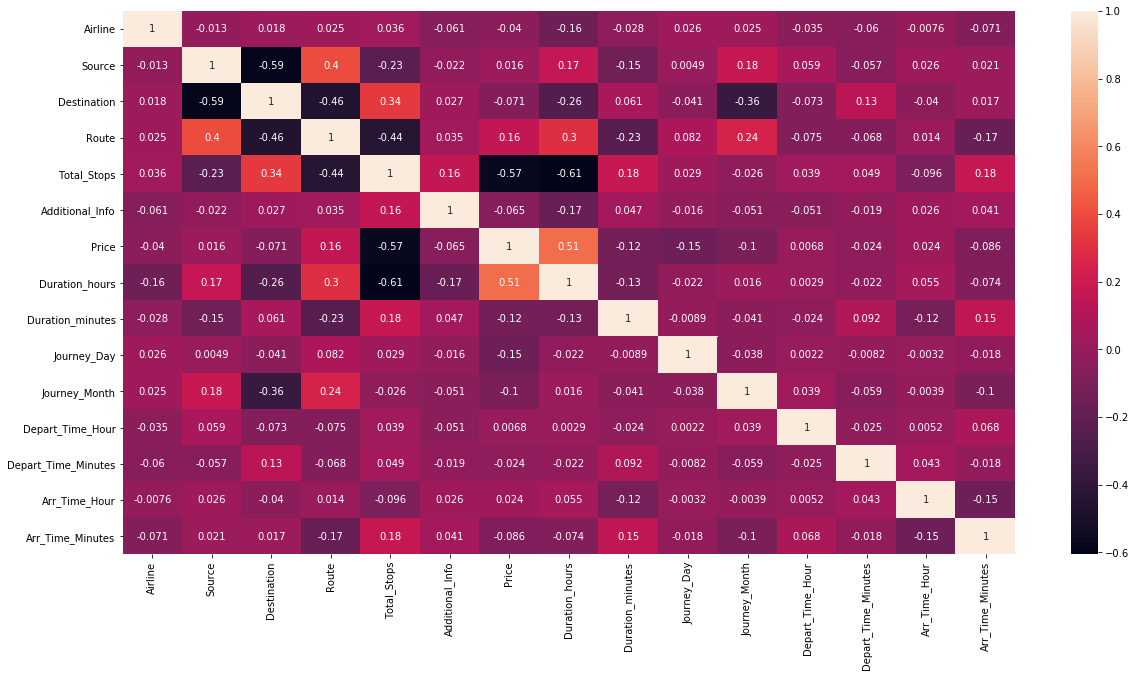

In [201]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_flight_train_corr, annot=True)
plt.show()

In [202]:
from scipy.stats import zscore
z_score=abs(zscore(df_flight_train))
print(df_flight_train.shape)
df_flight_train_final=df_flight_train.loc[(z_score<3).all(axis=1)]                  
print(df_flight_train_final.shape)
#to quantify the outliers in training set

(10682, 15)
(10512, 15)


In [203]:
df_flight_train=df_flight_train[(z_score<3).all(axis=1)]
#To remove the outliers

In [204]:
from scipy.stats import zscore
z_score=abs(zscore(df_flight_test))
print(df_flight_test.shape)
df_flight_test_final=df_flight_test.loc[(z_score<3).all(axis=1)]                  
print(df_flight_test_final.shape)
#to quantify the outliers in test set

(2671, 14)
(2650, 14)


In [205]:
df_flight_test=df_flight_test[(z_score<3).all(axis=1)]
#To remove the outliers

In [206]:
#Splitting of data
x_train = df_flight_train.iloc[:,df_flight_train.columns != 'Price'].values

x_test = df_flight_test.iloc[:,:].values

y_train = df_flight_train.iloc[:,6].values

In [207]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)


y_train = y_train.reshape((len(y_train), 1)) 

y_train = sc.fit_transform(y_train)

y_train = y_train.ravel()
#scaling down using standardscalar

In [210]:
#Implementing DecisionTreeRegressor model at random state 86 in training and test set
dtr = DecisionTreeRegressor()

dtr.fit(x_train,y_train)

y_pred = sc.inverse_transform(dtr.predict(x_test))


pd.DataFrame(y_pred, columns = ['Price']).to_excel("Final_Pred.xlsx", index = False)

In [212]:
print(pd.DataFrame(y_pred).head())

         0
0  14714.0
1   4226.0
2  12898.0
3  14277.0
4   3383.0


In [213]:
#Saving the model
import joblib
filename = 'Project17_model.pkl'
joblib.dump(dtr, filename)

['Project17_model.pkl']